In [1]:
# Required for importing modules from parent directory
import os
import sys

current_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.dirname(current_dir)
print(parent_dir)
sys.path.append(parent_dir)

c:\Users\I551674\Desktop\6. Semester\soccer_twos_rl


In [2]:
from path import Path
from src.utils import read_json_log_file

# Specify the file path
file_path = Path(parent_dir) / Path('src/runs/logs/logs.json')

logs = read_json_log_file(file_path)

# Process the logs
# ...

# Example: Print the logs
for log in logs[0:10]:
    print(log)


{'timestamp': '2024-06-18T13:49:22.982626+00:00', 'level': 'INFO', 'message': 'BaselineAgent', 'episode': 0, 'scores': [0.0, 0.0, 0.0, 0.0], 'average_score': 0.0, 'reward': '{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}', 'done': "{'__all__': False}", 'info': "{0: {'player_info': {'position': [-8.528812408447266, 1.2199244499206543], 'rotation_y': 87.729774, 'velocity': [8.045080184936523, 0.3189372420310974]}, 'ball_info': {'position': [1.090998649597168, 1.8254880905151367], 'velocity': [0.0, 0.0]}}, 1: {'player_info': {'position': [-5.738595008850098, -1.1645053625106812], 'rotation_y': 85.95333, 'velocity': [8.031326293945312, 0.5681799054145813]}, 'ball_info': {'position': [1.090998649597168, 1.8254880905151367], 'velocity': [0.0, 0.0]}}, 2: {'player_info': {'position': [5.954914569854736, 1.2630025148391724], 'rotation_y': 277.19568, 'velocity': [-7.987987995147705, 1.0085077285766602]}, 'ball_info': {'position': [1.090998649597168, 1.8254880905151367], 'velocity': [0.0, 0.0]}}, 3: {'player_i

In [3]:
import ast

info = ast.literal_eval(logs[-1]["info"])
info[0]

{'player_info': {'position': [-0.8819141983985901, 2.117034673690796],
  'rotation_y': 114.642975,
  'velocity': [5.811295986175537, 0.5449378490447998]},
 'ball_info': {'position': [-2.3571901321411133, 0.3287234306335449],
  'velocity': [-5.444622752865183e-15, -1.988098290439666e-07]}}

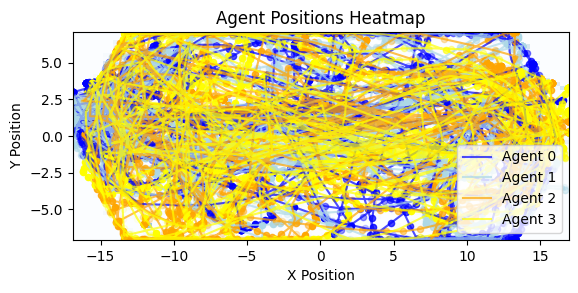

In [7]:
import ast
import numpy as np
import matplotlib.pyplot as plt

# Extract positions and paths for each agent
agent_positions = {0: [], 1: [], 2: [], 3: []}

for log_entry in logs:
    info = ast.literal_eval(log_entry['info'])
    for agent_id in info:
        agent_positions[int(agent_id)].append(info[agent_id]['player_info']['position'])

# Convert lists to numpy arrays for easier handling
for agent_id in agent_positions:
    agent_positions[agent_id] = np.array(agent_positions[agent_id])

# Create a heatmap
fig, ax = plt.subplots()
all_positions = np.vstack([agent_positions[agent_id] for agent_id in agent_positions])
heatmap, xedges, yedges = np.histogram2d(all_positions[:, 0], all_positions[:, 1], bins=50)

# Plot heatmap
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', alpha=0.5)

# Define colors for each agent
colors = ['blue', 'lightblue', 'orange', 'yellow']

for agent_id, color in zip(agent_positions, colors):
    num_points = len(agent_positions[agent_id])
    for i, pos in enumerate(agent_positions[agent_id]):
        alpha = (i + 1) / num_points  # More recent points will have lower transparency
        ax.scatter(pos[0], pos[1], color=color, alpha=alpha, s=20)  # Size fixed for simplicity
    ax.plot(agent_positions[agent_id][:, 0], agent_positions[agent_id][:, 1], color=color, alpha=0.7, label=f'Agent {agent_id}')

# Adding labels and legend
ax.set_title('Agent Positions Heatmap')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.legend()

# Show plot
plt.show()

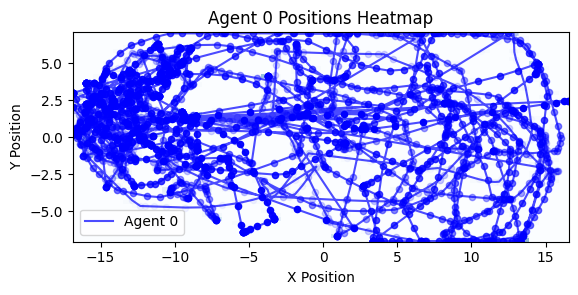

In [8]:
# Create a heatmap for Agent 0
fig, ax = plt.subplots()
all_positions = agent_positions[0]
heatmap, xedges, yedges = np.histogram2d(all_positions[:, 0], all_positions[:, 1], bins=50)

# Plot heatmap
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', alpha=0.5)

# Define color for Agent 0
color = 'blue'

num_points = len(agent_positions[0])
for i, pos in enumerate(agent_positions[0]):
    alpha = (i + 1) / num_points  # More recent points will have lower transparency
    ax.scatter(pos[0], pos[1], color=color, alpha=alpha, s=20)  # Size fixed for simplicity
ax.plot(agent_positions[0][:, 0], agent_positions[0][:, 1], color=color, alpha=0.7, label='Agent 0')

# Adding labels and legend
ax.set_title('Agent 0 Positions Heatmap')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.legend()

# Show plot
plt.show()
